In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import numpy as np
import mcu
import simple_angles_dataset_generator as simple_angles_gen
import dataset_generator


In [ ]:
figure_num = 300
figure_point_cnt = 300
deterministic_param_scatter = False
p = 3
noise_level=0
lw = np.array([40, 0, 0])
up = np.array([120, 45, 45])
param_names = np.array(["inside_angle", "rotation_angle_x", "rotation_angle_y"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, simple_angles_gen.generate_angles_points, noise_level=noise_level, min_num_points=figure_point_cnt)
k = 8
c = 10000
standardized_x, centered_y, edges, y_means, y_scaler, x_means, x_stds = mcu.prepare_data(control_vars, figures, k)

q = mcu.solve_semidefinite_programming(standardized_x, centered_y, edges, c)

In [29]:
ld_embedding = mcu.reduce_dimensions(q, p)
regression_matrix = mcu.regress(ld_embedding, standardized_x)
reconstructed_y = np.dot(standardized_x, regression_matrix)

ld_embedding_to_params = np.dot(ld_embedding, np.linalg.inv(regression_matrix)) * x_stds + x_means

rre = mcu.compute_rre(ld_embedding_to_params, control_vars)
print(np.median(rre))
mcu.plot_embeddings_vs_parameters(embedding=ld_embedding_to_params, params=control_vars, param_names=param_names)
mcu.plot_embeddings_vs_parameters(embedding=ld_embedding_to_params, params=control_vars, param_names=param_names, edges=edges)

LinAlgError: Last 2 dimensions of the array must be square

In [24]:
pieces_cnt = 10
test_data_size = 50
noise_level = 0.01
interval_runs, intervals = mcu.test_predictive_optimization(lw, up, p, k, simple_angles_gen.generate_angles_points, figure_point_cnt,
                                                 centered_y, ld_embedding, regression_matrix, y_means, y_scaler,
                                                 x_stds, x_means, noise_level, pieces_cnt, test_data_size,
                                                 same_value = False)

-----------
x_opt  = [52.23479428  5.63349875], x_err = 960.981829761834
x_real = [41.51268721  3.78295123]
-----------
x_opt  = [52.23479428  5.63349875], x_err = 541.3472543580551
x_real = [45.44735821  4.05243377]
-----------
x_opt  = [52.23479428  5.63349875], x_err = 653.4533097293704
x_real = [45.96010166  2.63869319]
-----------
x_opt  = [52.23479428  5.63349875], x_err = 489.4722666916033
x_real = [47.01000007  3.22186185]
-----------
x_opt  = [52.23479428  5.63349875], x_err = 895.8469215109096
x_real = [42.73452815  3.71504378]
-----------
x_opt  = [52.23479428  5.63349875], x_err = 1006.3352049806338
x_real = [41.81861751  3.02113936]
-----------
x_opt  = [52.23479428  5.63349875], x_err = 899.564083365571
x_real = [44.33908541  2.1947292 ]
-----------
x_opt  = [52.23479428  5.63349875], x_err = 774.90501081728
x_real = [45.79106231  2.02360034]
-----------
x_opt  = [52.23479428  5.63349875], x_err = 511.7305180491169
x_real = [46.30461523  3.77700256]
-----------
x_opt  = [

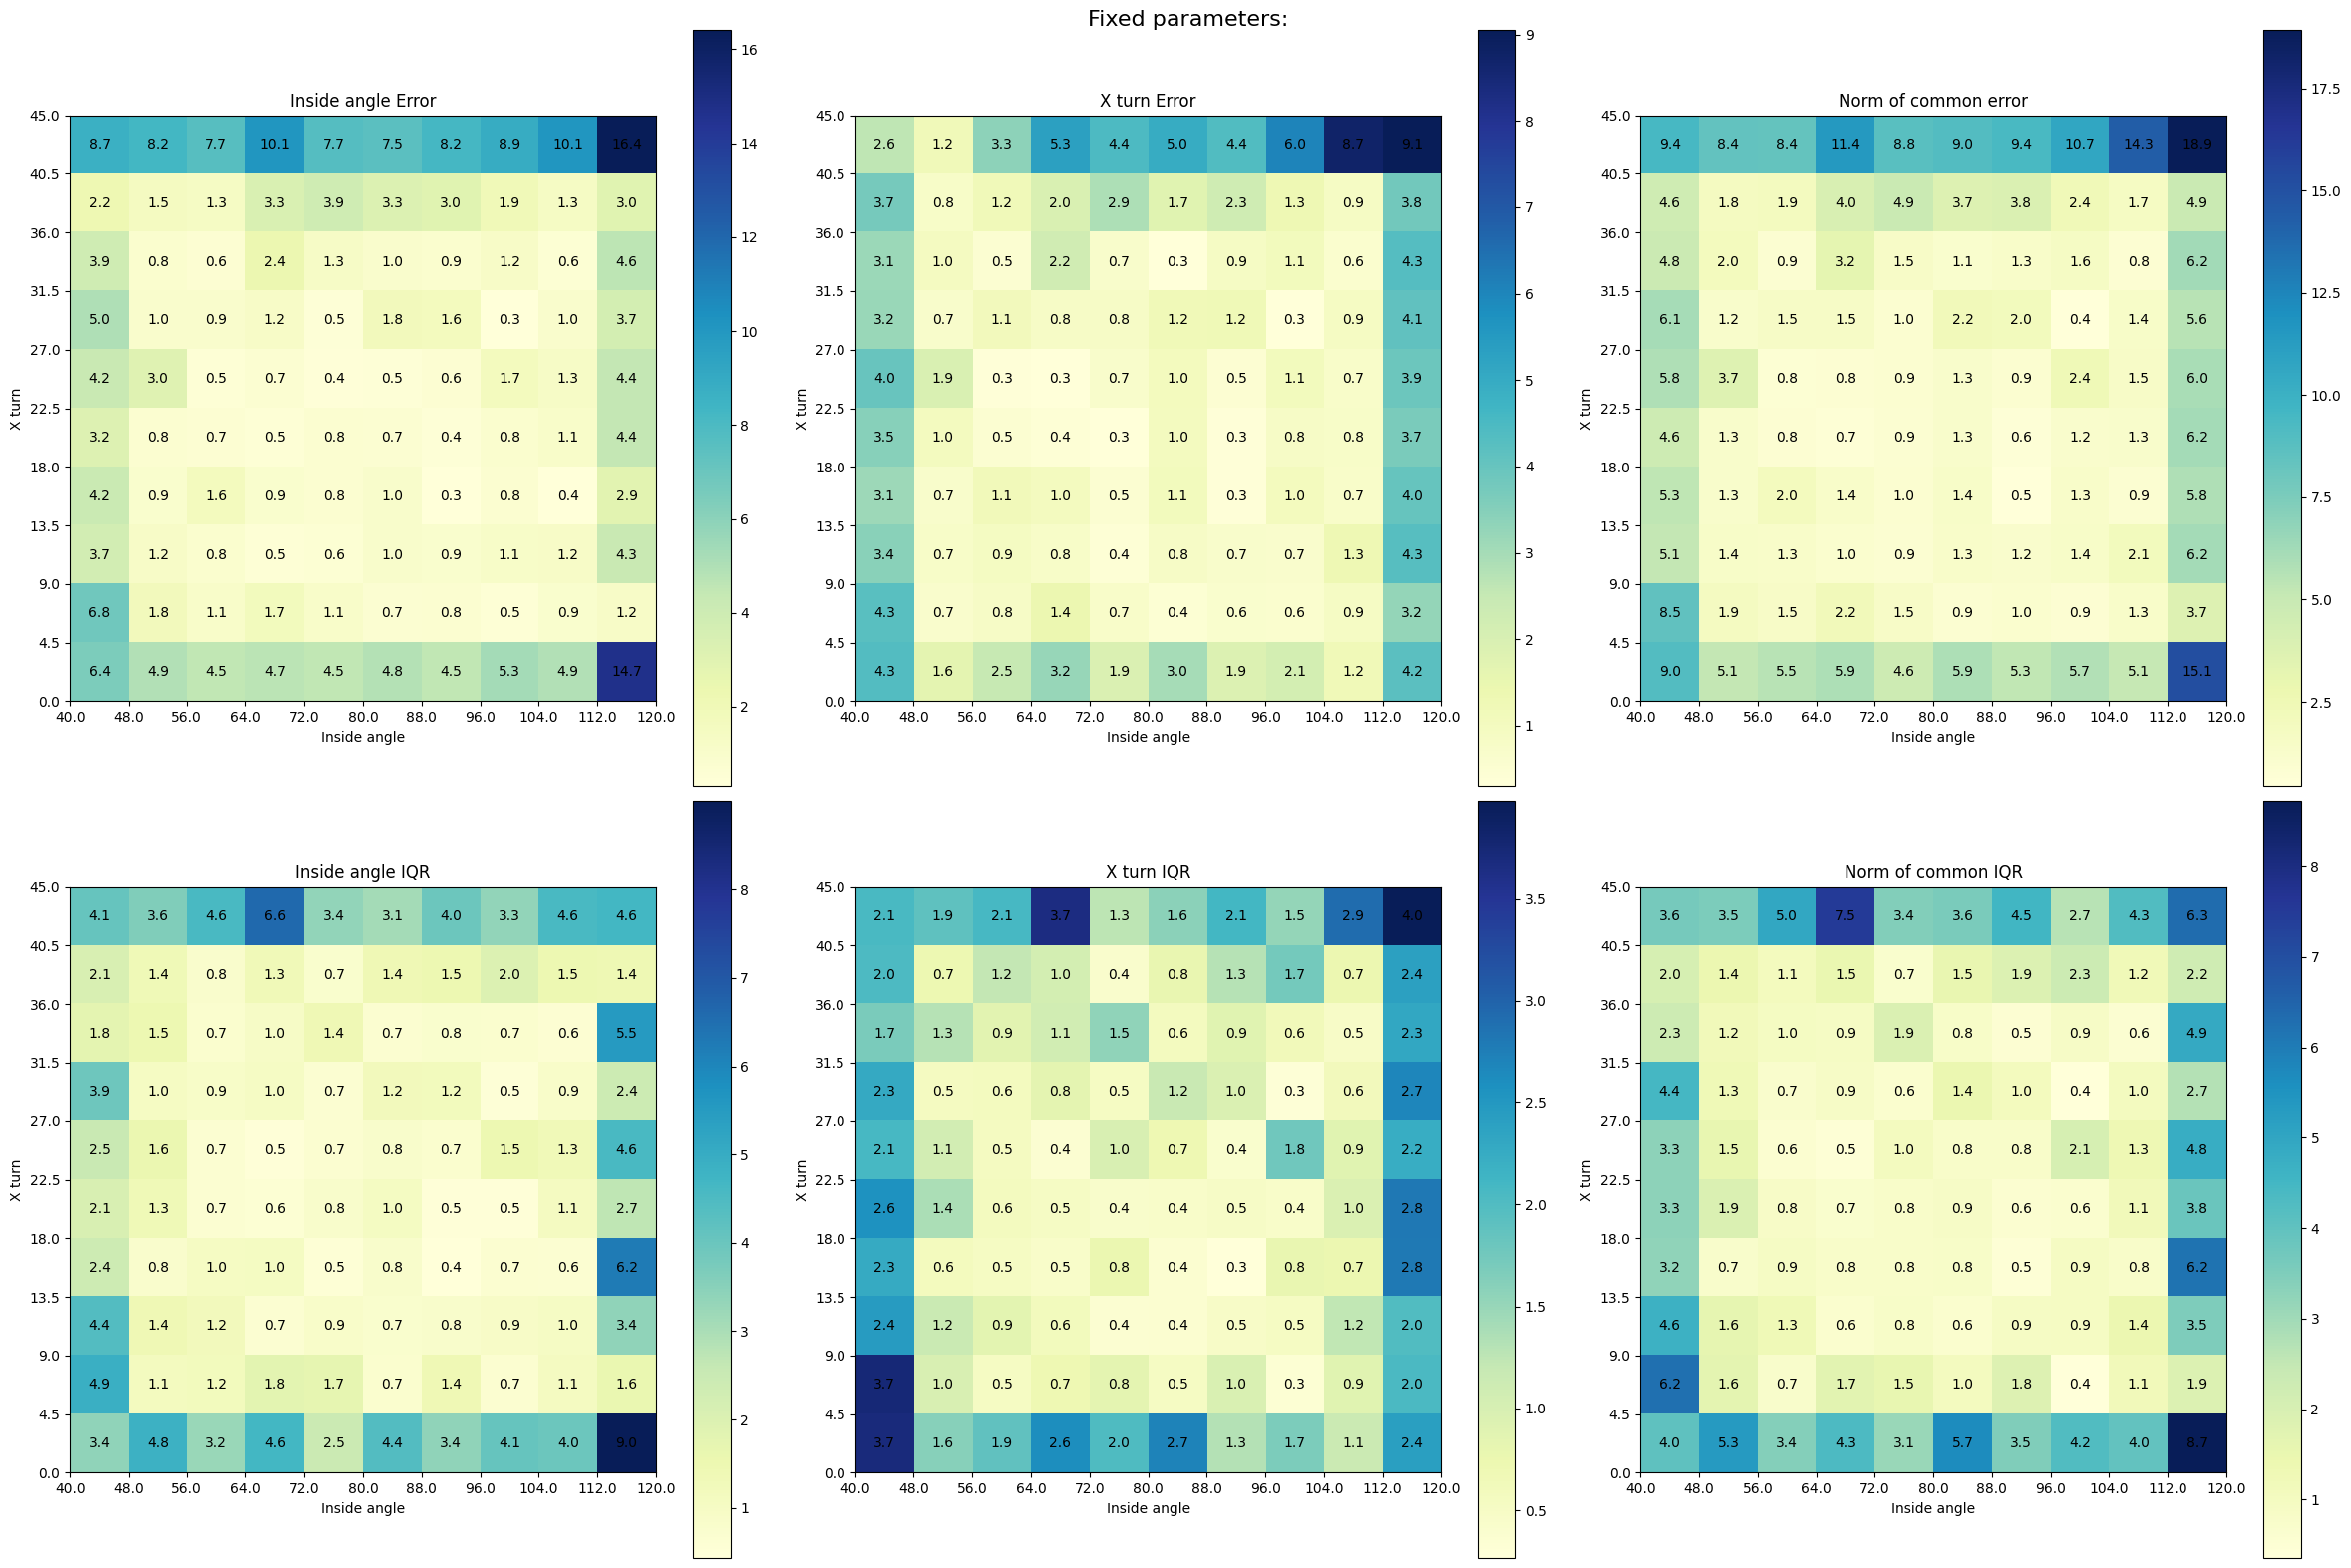

In [25]:
mcu.plot_2d_predictive_optimization_heatmaps(lw, up, pieces_cnt, interval_runs, p, all_param_names=param_names, intervals=intervals)